In [4]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
from dynamics_pendulum2 import pendulum
import pygame as pg
from scipy.optimize import minimize 
from pygame import gfxdraw
import cma

In [5]:
# Your code here
state_num=2
#action_num=100
order=3
d=(order+1)**state_num
#d_a=d*action_num
f_min=-2.5
f_max=2.5

def scale(state_):
    a_ = np.array([(state_[0]+2*np.pi)/(4*np.pi) ,(state_[1]+np.pi)/(2*np.pi) ])
    return a_

def create_c(k_,n_):#number of states, order
    c_ = [[] for j in range(k_)]
    for i in range(k_):
        for j in range(int(np.power(n_ + 1,i))):
            for p in range(n_ + 1):
                for r in range(int(np.power(n_ + 1,k_- i - 1))):
                    c_[i].append(p)
    c_ = np.array(c_,dtype = np.int8)
    return c_
c=create_c(state_num,order)

def create_x_i(s_): #for v_hat
    state = scale(s_)
    x_i_=np.cos(np.pi*(np.matmul(state,c)))
    return x_i_


def policy(st,theta_mu,theta_sigma):
    mu=np.matmul(theta_mu,create_x_i(st))
    sigma=np.exp(np.matmul(theta_sigma,create_x_i(st)))
    action=np.random.normal(mu,sigma,1)
    action=np.clip(action,f_min,f_max)
    return action


In [6]:
def reward(angle):
    return np.exp((angle-(np.pi))**2)

def new(theta):
    theta_mu = theta[0:d]
    theta_sigma=theta[d:]
    episode = 0
    step = np.empty(0)
    #state_list = []
    #step_per_episode = []
    #reward_sum = []
    pend = pendulum()
    t = 0
    action = np.empty(0)
    s = np.zeros((1,2))# states
    s[0] = [0,0]# 
    b=1
    total_cost=0
    while True :
        theta=np.append(theta_mu,theta_sigma)
        real_action=policy(s[t],theta_mu,theta_sigma)
        next_a_v, angle = pend.move(s[t][0], s[t][1], real_action)
        s = np.append(s,[[next_a_v,angle]],axis=0)
        #print(next_a_v,angle)
        cost_=reward(angle)
        total_cost+=cost_
        t += 1   
        if t>200:
            break
    #step_per_episode.append(t)
    #state_list.append(s)
    #reward_sum.append(-t)
    #return state_list,step_per_episode , reward_sum
    return total_cost ,s#, state_list


In [7]:
cost=new(2*d*[0])
print(cost[0])

1627787.29188502


In [9]:
def eval():
    theta=2*d*[0]
    sigma0=0.25
    costs=[]
    t=0
    for i in range(1):

        res = cma.CMAEvolutionStrategy(theta, sigma0).optimize(new,iterations=10).result

        #res=minimize(new,theta,method='Nelder-Mead')
        theta=res[0]
        sigma0=np.average(res[-2])
        costs.append(res[1])
        #print(res)
        t+=1
        print("step",t)
    _,s=new(theta)
    return costs ,s#,res#, states
#costs , states=eval()
costs,s=eval()

#plt.plot(states[:,1])

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32 (seed=293126, Wed Mar 31 19:19:32 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 9.325391335465523e+05 1.0e+00 2.35e-01  2e-01  2e-01 0:01.4


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1257596.9004203882, array([[ 0.00000000e+00,  0.00000000e+00],
       [ 3.32603278e-02,  1.67013244e-03],
       [ 5.24321558e-02,  5.97253383e-03],
       [ 5.37554315e-02,  1.13037567e-02],
       [ 2.15174414e-02,  1.50826077e-02],
       [ 2.22723102e-02,  1.72811016e-02],
       [ 3.87272161e-03,  1.85935784e-02],
       [-8.18249474e-03,  1.83771077e-02],
       [ 2.17377695e-02,  1.90579073e-02],
       [ 2.12534250e-02,  2.12163001e-02],
       [ 2.63816334e-02,  2.36078870e-02],
       [ 8.99368549e-03,  2.53837837e-02],
       [ 4.32932446e-02,  2.80091633e-02],
       [ 6.88875885e-02,  3.36414726e-02],
       [ 1.20255366e-01,  4.31379096e-02],
       [ 1.13024841e-01,  5.48497705e-02],
       [ 9.43306662e-02,  6.52599465e-02],
       [ 6.05782056e-02,  7.30368829e-02],
       [ 3.59123852e-02,

    2     28 3.091706358763663e+05 1.1e+00 2.24e-01  2e-01  2e-01 0:02.8


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (2336232.8117624577, array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.36210830e-02,  6.28250134e+00],
       [ 2.34893569e-01,  1.04270876e-02],
       [ 1.99606120e-01,  3.22410889e-02],
       [ 1.75926450e-01,  5.10946699e-02],
       [ 8.57250846e-02,  6.42301968e-02],
       [-1.76518202e-02,  6.76469569e-02],
       [-1.84547337e-01,  5.74941139e-02],
       [-2.12526110e-01,  3.75586570e-02],
       [-2.48512840e-01,  1.44116503e-02],
       [-2.78432233e-01,  6.27114111e+00],
       [-3.85409432e-01,  6.23781170e+00],
       [-1.05704935e-01,  6.21315754e+00],
       [ 1.78876109e-01,  6.21683331e+00],
       [ 2.51624987e-01,  6.23844734e+00],
       [ 2.27892135e-01,  6.26252154e+00],
       [ 4.79989355e-01,  1.48779479e-02],
       [ 3.99581947e-01,  5.90365434e-02],
       [ 2.34004116e-01,

    3     42 3.846018615422022e+05 1.1e+00 2.20e-01  2e-01  2e-01 0:04.2
    6     84 2.748594310988031e+05 1.1e+00 2.23e-01  2e-01  2e-01 0:08.4
    9    126 2.242593569610740e+05 1.2e+00 2.35e-01  2e-01  2e-01 0:12.5
step 1


Text(0.5, 0, 'steps')

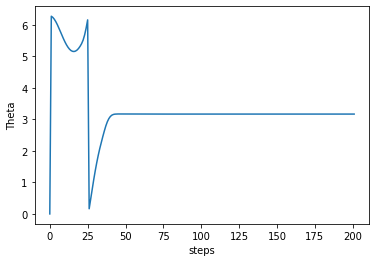

In [63]:

states=np.array(s)
#print(s)
#plt.plot(states[:,0])
plt.plot(states[:,1])
plt.ylabel("Theta")
plt.xlabel("steps")

Text(0.5, 0, 'steps')

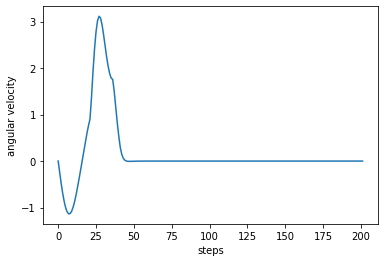

In [64]:
plt.plot(states[:,0])
plt.ylabel("angular velocity")
plt.xlabel("steps")

Text(0.5, 0, 'iteration')

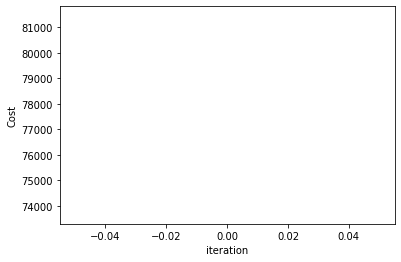

In [67]:
plt.plot(costs)
plt.ylabel("Cost")
plt.xlabel("iteration")

In [68]:
print(costs)

[77554.65664678752]
